In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Gamma function
from scipy.special import gamma

# To calculate statistics
from scipy.stats import norm
from scipy.stats import hmean, trim_mean, iqr, median_abs_deviation, skew, kurtosis
from scipy.stats.mstats import gmean, winsorize

---

Reading and preprocessing data

In [23]:
DataWhr2024 = pd.read_csv("DataWhr2024.csv")
UnM49 = pd.read_csv("UnM49.csv", sep=';')

In [24]:
UnM49 = UnM49[['Country or Area', 'Sub-region Name', 'Region Name']]
UnM49 = UnM49.rename({'Country or Area':'Country name', 'Sub-region Name':'Subregion', 'Region Name':'Continent'}, axis=1)

In [25]:
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Hong"), "Country name"] = "Hong Kong"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Somaliland"), "Country name"] = "Somaliland"
DataWhr2024.loc[DataWhr2024["Country name"].str.startswith("Taiwan"), "Country name"] = "Taiwan"

In [26]:
UnM49.loc[97, "Country name"] = "Bolivia"
UnM49.loc[33, "Country name"] = "Congo (Brazzaville)"
UnM49.loc[34, "Country name"] = "Congo (Kinshasa)"
UnM49.loc[124, "Country name"] = "Hong Kong"
UnM49.loc[125, "Country name"] = "Macao"
UnM49.loc[126, "Country name"] = "North Korea"
UnM49.loc[145, "Country name"] = "Iran"
UnM49.loc[46, "Country name"] = "Ivory Coast"
UnM49.loc[133, "Country name"] = "Laos"
UnM49.loc[129, "Country name"] = "South Korea"
UnM49.loc[173, "Country name"] = "Moldova"
UnM49.loc[217, "Country name"] = "Netherlands"
UnM49.loc[175, "Country name"] = "Russia"
UnM49.loc[164, "Country name"] = "Syria"
UnM49.loc[26, "Country name"] = "Tanzania"
UnM49.loc[116, "Country name"] = "United States"
UnM49.loc[193, "Country name"] = "United Kingdom"
UnM49.loc[111, "Country name"] = "Venezuela"
UnM49.loc[140, "Country name"] = "Vietnam"

In [27]:
_ = pd.DataFrame(
    {
        "Country name": ["Kosovo", "Somaliland", "Taiwan"],
        "Subregion": ["Southern Europe", "Sub-Saharan Africa", "Eastern Asia"],
        "Continent": ["Europe", "Africa", "Asia"],
    }
)

UnM49 = pd.concat([UnM49, _], axis=0)
UnM49 = UnM49.reset_index(drop=True)

---

In [28]:
# Data
Dat = pd.merge(DataWhr2024, UnM49)

In [29]:
# Data of 2023
Dat2023 = Dat[Dat['year'] == 2023]
Dat2023 = Dat2023.reset_index(drop=True)

In [30]:
# Countries that starts with the same letter that your name
StartsWith = 'I' # The first letter of your name
list(Dat[Dat['Country name'].str.startswith(StartsWith)]['Country name'].unique())

['Iceland',
 'India',
 'Indonesia',
 'Iran',
 'Iraq',
 'Ireland',
 'Israel',
 'Italy',
 'Ivory Coast']

In [31]:
# Data of 2023 from the region selected
CountrySelected = 'Thailand' # Change to the country that you selected
SubregionSelected = Dat[Dat['Country name']==CountrySelected]['Subregion'].unique()[0]

DatSelected = Dat2023[Dat2023['Subregion']==SubregionSelected]
DatSelected = DatSelected.reset_index(drop=True)

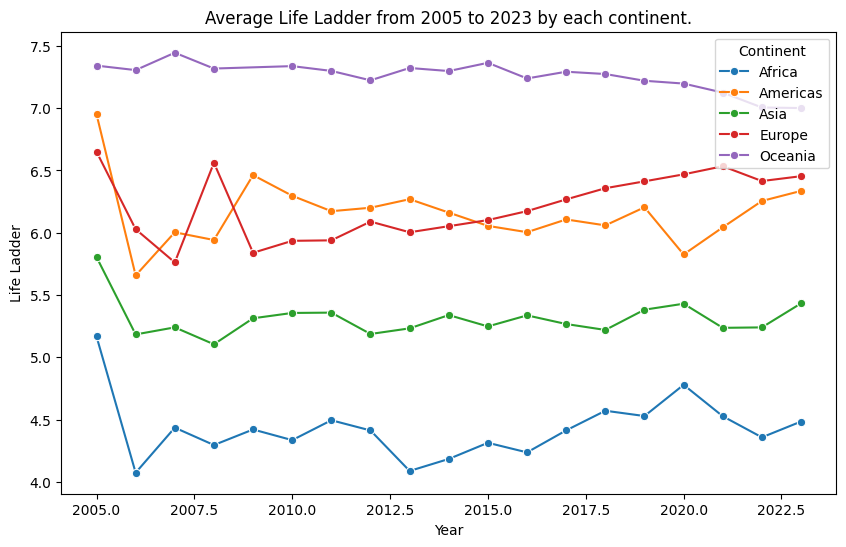

In [33]:
Variable = 'Life Ladder'
DatThroughTime = Dat[['year', 'Continent' , Variable]].groupby(['year', 'Continent']).mean().reset_index()

plt.figure(figsize=[10, 6])

sns.lineplot(
    data = DatThroughTime,
    x = "year",
    y = Variable,
    hue = 'Continent',
    marker = "o"
)

plt.title("Average Life Ladder from 2005 to 2023 by each continent.")
plt.xlabel("Year")
plt.ylabel("Life Ladder")
plt.legend(
    title = "Continent",
    loc = "upper right"
)
plt.show()

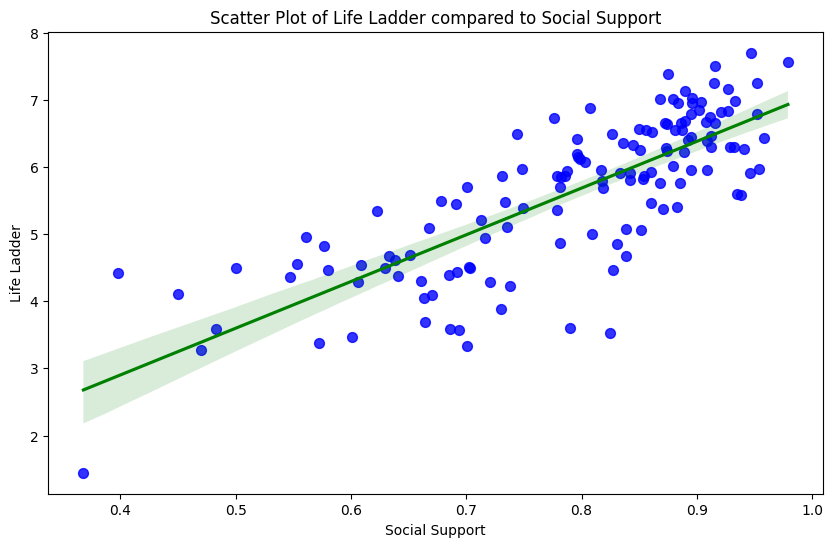

In [35]:
plt.figure(figsize=[10, 6])

sns.regplot(
    x = "Social support",
    y = "Life Ladder",
    data = Dat2023,
    scatter_kws = {'s': 50, 'color': 'blue'},
    line_kws = {'color': 'green'}
)

plt.title('Scatter Plot of Life Ladder compared to Social Support')
plt.xlabel("Social Support")
plt.ylabel("Life Ladder")

plt.show()

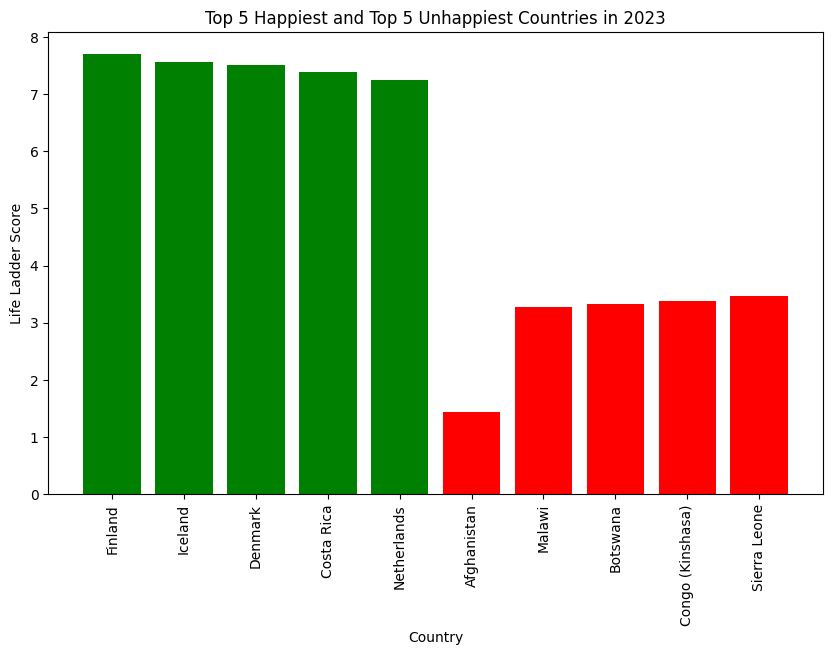

In [39]:
top_5_happiest = Dat2023.nlargest(5, 'Life Ladder')
top_5_unhappiest = Dat2023.nsmallest(5, 'Life Ladder')

combined_data = pd.concat(
    [
        top_5_happiest,
        top_5_unhappiest
    ]
)

plt.figure(figsize = (10, 6))
plt.bar(combined_data['Country name'], combined_data['Life Ladder'],
        color=['green'] * 5 + ['red'] * 5)
plt.xlabel('Country')
plt.ylabel('Life Ladder Score')
plt.title('Top 5 Happiest and Top 5 Unhappiest Countries in 2023')
plt.xticks(rotation=90)

plt.show()

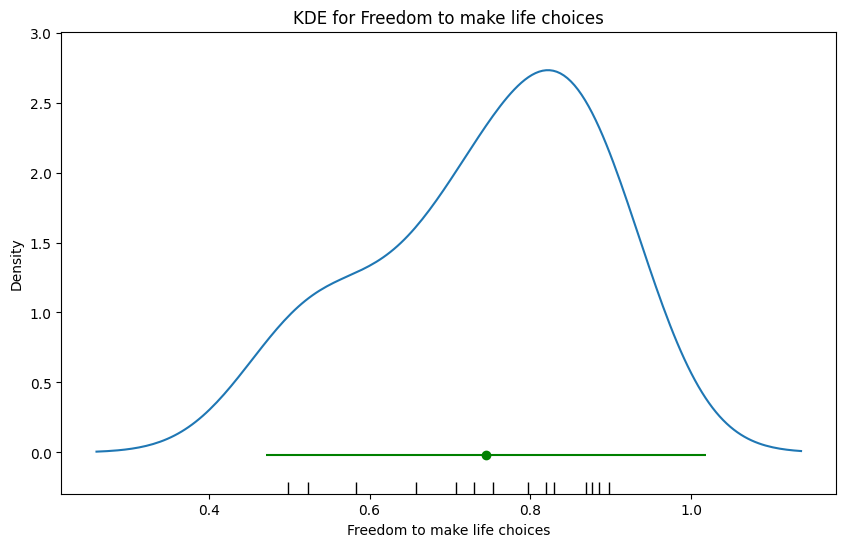

In [40]:
variable = 'Freedom to make life choices'

subregion_data = DatSelected[variable].dropna()

Mu = subregion_data.mean()
Sigma = subregion_data.std(ddof=1)

N = len(subregion_data)

ALPHA = 0.05

LowerLimit = norm.ppf(ALPHA / 2, Mu, (np.sqrt(1 + 1 / N)) * Sigma)
UpperLimit = norm.ppf(1 - ALPHA / 2, Mu, (np.sqrt(1 + 1 / N)) * Sigma)

plt.figure(figsize=(10, 6))

sns.kdeplot(subregion_data, label=f'KDE of {variable}')

sns.rugplot(subregion_data, color='black')

plt.hlines(y = -.02, xmin = LowerLimit, xmax = UpperLimit, color = 'green')
plt.plot(Mu, -0.02, 'go')

plt.title(f'KDE for {variable}')
plt.xlabel(variable)
plt.ylabel('Density')

plt.show()